In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [2]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
ϵ = 1e-4;

xs = collect(0.1:0.01:0.9)
ys = collect(0.0:0.01:0.4)
n = length(xs)
m = length(ys)
Z = zeros(m,n)
right = Dict{String, Any}()
Lx, Nx, ϕa, ϕp, v0 =  100.0, 1024, 0.45, 0.35, 7.5
for (i,ϕa) in enumerate(xs)
for (j,ϕp) in enumerate(ys)
    try
        input_param = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_out_3(input_param...)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        param, p2 = get_outer_param_3(input_param...)
        err, avmag, c = check_u_3(u,p2);
        if (normf > ϵ)&&(err<ϵ)
            Z[j,i] = 3
            if ϕp in keys(right)
                right["$(ϕp)"] = max(right["$(ϕp)"][1],ϕa), ϕp
            else
                right["$(ϕp)"] = ϕa, ϕp
            end
            # ax.scatter(ϕa,ϕp; marker = "x", color = "blue")
        end
    catch
    end
end
end

ϕs = collect(0.38:0.01:0.95)
γs = collect(1.25:0.01:2.2)
n = length(ϕs)
m = length(γs)
Y = zeros(m,n)
left = Dict{String, Any}()
Lx, Nx, ϕa, ϕp, v0 =  100.0, 1024, 0.45, 0.35, 7.5
for (i,ϕ) in enumerate(ϕs)
for (j,γ) in enumerate(γs)
    try
        input_param = Lx,Nx,ϕa,ϕp,v0,ϕ,γ
        
        f,u,c = load_out_5(input_param...)
        ϕp = d2(sum(f)/Nx-sum(f[:,1:2])/Nx)
        ϕa = d2(sum(f[:,1:2])/Nx)

        param, ps = get_outer_param_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
        err, erri, avmag, cep = check_u_5(u,ps)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)

        if (normf > ϵ)&&(err<ϵ)
            Y[j,i] = 5
            if ϕp in keys(left)
                left["$(ϕp)"] = min(left["$(ϕp)"][1],ϕa), ϕp
            else
                left["$(ϕp)"] = ϕa, ϕp
            end
            # ax.scatter(ϕa,ϕp; marker = "x", color = "green")
        end
    catch
    end
end
end

inds = collect(16:8:1008)
γs = collect(1.2:0.01:2.2)
n = length(inds)
m = length(γs)
X = zeros(m,n)
bottom = Dict{String, Any}()
Lx, Nx, ϕa, ϕp, v0 =  100.0, 1024, 0.45, 0.35, 7.5
for (i,ind) in enumerate(inds)
for (j,γ) in enumerate(γs)
    try
        input_param = Lx,Nx,ϕa,ϕp,v0,ind,γ
        
        f,u,c = load_out_6(input_param...)
        ϕp = d2(sum(f)/Nx-sum(f[:,1:2])/Nx)
        ϕa = d2(sum(f[:,1:2])/Nx)

        param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        err, erri, avmag, cep = check_u_6(u,ps)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)

        if (normf > ϵ)&&(err<ϵ)&&(c>ϵ^2)
            X[j,i] = 6
            if ϕa in keys(bottom)
                bottom["$(ϕa)"] = ϕa, min(bottom["$(ϕa)"][2],ϕp)
            else
                bottom["$(ϕa)"] = ϕa, ϕp
            end
            # ax.scatter(ϕa,ϕp; marker = "x", color = "red")
        end
    catch
    end
end
end


In [ ]:
# additional upper points 
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.7277882798280917, 0.17, 7.5
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.7400303027522923, 0.16, 7.5
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.7494700241033495, 0.152, 7.5
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.7600238809861899, 0.143, 7.5
Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.7698983711567685, 0.1345, 7.5

In [3]:
Pe = 7.5
file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Pe=$(Pe).jld2"
data = Dict{String,Any}()
@pack! data = X,Y,Z
safesave(file_name,data)


# file_name = "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/TP/Δϕ=$(Δϕ)_Pe=$(Pe).jld2"
# data = load(file_name)
# @unpack X,Y,Z = data

In [33]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
left = Dict{String, Any}()
ϕs = collect(0.38:0.01:0.95)
γs = collect(1.25:0.01:2.2)
n = length(ϕs)
m = length(γs)
Lx, Nx, ϕa, ϕp, v0 =  100.0, 1024, 0.45, 0.35, 7.5
for (i,ϕ) in enumerate(ϕs)
for (j,γ) in enumerate(γs)
    if Y[j,i] == 5
        ϕa, ϕp = d2.(gamma_converter(γ, ϕ))
        # if ϕp in keys(left)
        #     left["$(ϕp)"] = min(left["$(ϕp)"][1],ϕa), ϕp
        # else
        #     left["$(ϕp)"] = ϕa, ϕp
        # end
        ax.scatter(ϕa,ϕp; marker = "x", color = "green")
    end
end
end

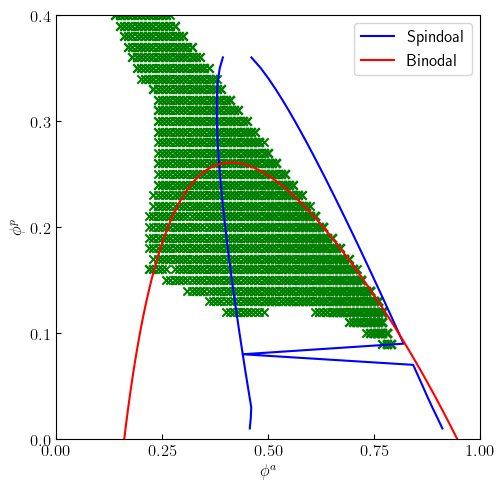

In [34]:
# using PyPlot, LaTeXStrings
# fig, ax = subplots(1,1,figsize=(5,5))
# for (ϕa, ϕp) in values(left)
#     ax.scatter(ϕa,ϕp; marker = "x", color = "green")
# end
plot_phase(fig, ax, v0, 12; Lxs = [])
display(fig)

In [7]:
input = 40

Lx,Nx,ϕa,ϕp,v0,ϕ,_ = 100.0, 1024, 0.3, 0.3, 7.5, 0.56, 2.2
γ = collect(1.26:0.01:2.2)[input] # 95

# sweep range
ind_range = [(i,0) for i in collect(1:41) ] 
input_params = [(Lx,Nx,ϕa,ϕp,v0, d2(ϕ+0.01*i),d2(γ+0.01*j) ) for (i,j) in ind_range]

41-element Vector{Tuple{Float64, Int64, Vararg{Float64, 5}}}:
 (100.0, 1024, 0.3, 0.3, 7.5, 0.57, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.58, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.59, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.6, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.61, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.62, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.63, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.64, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.65, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.66, 1.65)
 ⋮
 (100.0, 1024, 0.3, 0.3, 7.5, 0.89, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.9, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.91, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.92, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.93, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.94, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.95, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.96, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.97, 1.65)

In [12]:
ϕ,γ = 0.56, 1.65
input_param = Lx,Nx,ϕa,ϕp,v0,ϕ,γ
        
f,u,c = load_out_5(input_param...)
        ϕp = d2(sum(f)/Nx-sum(f[:,1:2])/Nx)
        ϕa = d2(sum(f[:,1:2])/Nx)

        param, ps = get_outer_param_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
        err, erri, avmag, cep = check_u_5(u,ps)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
print(err, " ", normf)

7.189804307472514e-13 0.08595860585967553

In [17]:
function load_adjacent_5(Lx, Nx, ϕa, ϕp, v0, ϕ, γ) # f,u,c = / "fail"
    ind_range = [(i,j) for j in [0,1,-1], i in [0,1,-1,2,-2]]
    input_params = [(Lx,Nx,ϕa,ϕp,v0, d2(ϕ+0.01*i),d2(γ+0.01*j) ) for (i,j) in ind_range]
    ϵ = 1e-4
    for input_param in input_params
        try
            Lx,Nx,ϕa,ϕp,v0,ϕ,γ = input_param
            param, ps = get_outer_param_5(input_param...)
            f,u,c = load_out_5(input_param...)
            ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
            ϕa = sum(f[:,1:2])/Nx
            normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
            err, erri, avmag, cep = check_u_5(u,ps)
            if (normf > ϵ)&&(err<ϵ)
                print("loaded: $((Lx,Nx,d2(ϕa),d2(ϕp),v0,ϕ,γ))")
                return f,u,c
            end
        catch
        end
    end
    return "fail"
end
input = 40
Lx,Nx,ϕa,ϕp,v0,ϕ,_ = 100.0, 1024, 0.3, 0.3, 7.5, 0.56, 2.2
γ = collect(1.26:0.01:2.2)[input] # 95

1.65

In [18]:
ind_range = [(i,0) for i in collect(1:41) ] 
input_params = [(Lx,Nx,ϕa,ϕp,v0, d2(ϕ+0.01*i),d2(γ+0.01*j) ) for (i,j) in ind_range]

41-element Vector{Tuple{Float64, Int64, Vararg{Float64, 5}}}:
 (100.0, 1024, 0.3, 0.3, 7.5, 0.57, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.58, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.59, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.6, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.61, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.62, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.63, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.64, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.65, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.66, 1.65)
 ⋮
 (100.0, 1024, 0.3, 0.3, 7.5, 0.89, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.9, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.91, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.92, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.93, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.94, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.95, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.96, 1.65)
 (100.0, 1024, 0.3, 0.3, 7.5, 0.97, 1.65)

In [19]:
ϵ = 1e-4
# load adjecnt then solve; stop if err/small 
for input_param in input_params
    output = load_adjacent_5(input_param...);
    if output == "fail"
        print("load_fail: $(input_param)")
        break 
    else
        f,u,c = output;
        Lx,Nx,ϕa,ϕp,v0,ϕ,γ = input_param
        
        solve_out_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ,u; tol = 1e-8, maxiters = 10)
        ϕp = d2(sum(f)/Nx-sum(f[:,1:2])/Nx)
        ϕa = d2(sum(f[:,1:2])/Nx)

        param, ps = get_outer_param_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
        err, erri, avmag, cep = check_u_5(u,ps)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)

        if (normf < ϵ)
            print("norm end: $(input_param)")
            break
        elseif (err > ϵ)
            print("err end: $(input_param)")
            break
        end
        ax.scatter(ϕa, ϕp)
    end
end

loaded: (100.0, 1024, 0.27, 0.29, 7.5, 0.56, 1.65)loaded: (100.0, 1024, 0.28, 0.29, 7.5, 0.57, 1.65)loaded: (100.0, 1024, 0.29, 0.31, 7.5, 0.6, 1.65)loaded: (100.0, 1024, 0.29, 0.31, 7.5, 0.6, 1.65)loaded: (100.0, 1024, 0.29, 0.31, 7.5, 0.6, 1.65)loaded: (100.0, 1024, 0.3, 0.31, 7.5, 0.61, 1.65)loaded: (100.0, 1024, 0.31, 0.31, 7.5, 0.62, 1.65)loaded: (100.0, 1024, 0.32, 0.31, 7.5, 0.63, 1.65)loaded: (100.0, 1024, 0.32, 0.32, 7.5, 0.64, 1.65)loaded: (100.0, 1024, 0.33, 0.32, 7.5, 0.65, 1.65)loaded: (100.0, 1024, 0.34, 0.32, 7.5, 0.66, 1.65)loaded: (100.0, 1024, 0.35, 0.32, 7.5, 0.67, 1.65)loaded: (100.0, 1024, 0.38, 0.32, 7.5, 0.7, 1.65)loaded: (100.0, 1024, 0.38, 0.32, 7.5, 0.7, 1.65)loaded: (100.0, 1024, 0.38, 0.32, 7.5, 0.7, 1.65)loaded: (100.0, 1024, 0.4, 0.31, 7.5, 0.71, 1.65)loaded: (100.0, 1024, 0.41, 0.31, 7.5, 0.72, 1.65)loaded: (100.0, 1024, 0.42, 0.31, 7.5, 0.73, 1.65)loaded: (100.0, 1024, 0.44, 0.3, 7.5, 0.74, 1.65)loaded: (100.0, 1024, 0.45, 0.3, 7.5, 0.75, 1.65)loaded: (1

In [ ]:
# n = length(xs)
# m = length(ys)

# # X = collect(Iterators.flatten( xs' .* ones(m)))
# # Y = collect(Iterators.flatten( ones(n)' .* ys ))
# # ax.contour(xs, ys, Z, [0.5])

# x_coords = [x for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 3)]
# y_coords = [y for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 3)]
# ax.scatter(x_coords,y_coords; marker = "x", color = "blue")

In [159]:
# find anomolies
anom_params = []
for (i,ϕa) in enumerate(xs)
for (j,ϕp) in enumerate(ys)
    if (i>1)&&(i<n)&&(j>1)&&(j<m)
        if (Z[j,i] == 0)&&(Z[j,i+1] == 3)&&(Z[j,i-1] == 3)
            input_param = (Lx, Nx, ϕa, ϕp, v0)
            push!(anom_params,input_param)
        end
    end
end
end
anom_params

1-element Vector{Any}:
 (100.0, 1024, 0.5, 0.32, 7.5)

In [57]:
x_coords = [x for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
y_coords = [y for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
y_coords = [y for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
# ϕa_min = x_coords[argmin(y_coords)]
# ϕa, ϕp = minimum(x_coords), y_coords[argmin(x_coords)]
# ϕa, ϕp = maximum(x_coords), y_coords[argmax(x_coords)]
# ϕa, ϕp = x_coords[argmin(y_coords)], minimum(y_coords)
# maximum(y_coords)

(0.7, 0.17)

In [69]:
function load_adjacent_3(Lx, Nx, ϕa, ϕp, v0) # f,u,c = / "fail"
    ind_range = [(i,j) for j in [0,1,-1], i in [0,1,-1,2,-2]]
    input_params = [(Lx, Nx, d2(ϕa + 0.01*i), d2(ϕp +0.01*j), v0) for (i,j) in ind_range]
    ϵ = 1e-4
    for input_param in input_params
        try
            Lx, Nx, ϕa, ϕp, v0 = input_param
            f,u,c = load_out_3(input_param...)
            normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
            param, p2 = get_outer_param_3(input_param...)
            err, avmag, c = check_u_3(u,p2);
            if (normf > ϵ)&&(err<ϵ)
                print("loaded: $(input_param)")
                return f,u,c
            end
        catch
        end
    end
    return "fail"
end

function load_adjacent_5(Lx, Nx, ϕa, ϕp, v0, ϕ, γ) # f,u,c = / "fail"
    ind_range = [(i,j) for j in [0,1,-1], i in [0,1,-1,2,-2]]
    input_params = [(Lx,Nx,ϕa,ϕp,v0, d2(ϕ+0.01*i),d2(γ+0.01*j) ) for (i,j) in ind_range]
    ϵ = 1e-4
    for input_param in input_params
        try
            Lx,Nx,ϕa,ϕp,v0,ϕ,γ = input_param
            param, ps = get_outer_param_5(input_param...)
            f,u,c = load_out_5(input_param...)
            ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
            ϕa = sum(f[:,1:2])/Nx
            normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
            err, erri, avmag, cep = check_u_5(u,ps)
            if (normf > ϵ)&&(err<ϵ)
                print("loaded: $((Lx,Nx,d2(ϕa),d2(ϕp),v0,ϕ,γ))")
                return f,u,c
            end
        catch
        end
    end
    return "fail"
end


function load_adjacent_6(Lx, Nx, ϕa, ϕp, v0, ind, γ) # f,u,c,ps,ind = / "fail"
    ind_range = [(i,j) for j in [0,1,-1,2,-2], i in [0,1,-1]]
    input_params = [(Lx,Nx,ϕa,ϕp,v0, Int64(ind+8*i),d2(γ+0.01*j) ) for (i,j) in ind_range]
    ϵ = 1e-4
    for input_param in input_params
        try
            Lx,Nx,ϕa,ϕp,v0,ind,γ = input_param
            param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
            
            f,u,c = load_out_6(input_param...)
            ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
            ϕa = sum(f[:,1:2])/Nx

            normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
            err, erri, avmag, cep = check_u_6(u,ps);
            rhodiff = u[ind+1] - u[ind]

            if (normf>ϵ)&&(err<ϵ)&&(rhodiff>ϵ)
                print("loaded: $((Lx,Nx,d2(ϕa),d2(ϕp),v0,ind,γ))")
                return f,u,c,ps,ind
            end
        catch
        end
    end
    return "fail"
end

load_adjacent_6 (generic function with 1 method)

In [83]:
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 512, 1.65
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 328, 1.75
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 120, 1.8
# Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 16, 1.8
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 904, 1.4

using PyPlot, LaTeXStrings
# fig, ax = subplots(1,1,figsize=(5,5))
# ind_range = [(0,i) for i in collect(-1:-1:-26)]
# ind_range = [(0,i) for i in collect(1:1:80)]
ind_range = [(i,0) for i in collect(1:1:14)]
# ind_range = [(i,0) for i in collect(-1:-1:-14)]

input_params = [(Lx,Nx,ϕa,ϕp,v0, Int64(ind+8*i),d2(γ+0.01*j) ) for (i,j) in ind_range]
ϵ = 1e-4;

# load adjecnt then solve; stop if err/small 
for input_param in input_params
    output = load_adjacent_6(input_param...);
    if output == "fail"
        print("load_fail: $(input_param)")
        break 
    else
        f,u,c,p2,ind2 = output;
        Lx,Nx,ϕa,ϕp,v0,ind,γ = input_param
        param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        
        if ind2 > ind
            u,ps = decrease_inds(u,p2,ind2-ind)
        elseif ind2 < ind
            u,ps = increase_inds(u,p2,ind-ind2)
        end
        f,u,c = solve_out_6(Lx,Nx,ϕa,ϕp,v0,ind,γ,u; tol = 1e-8, maxiters = 10)
        ϕp = d2(sum(f)/Nx-sum(f[:,1:2])/Nx)
        ϕa = d2(sum(f[:,1:2])/Nx)

        param, ps = get_outer_param_6(Lx,Nx,ϕa,ϕp,v0,ind,γ)
        err, erri, avmag, cep = check_u_6(u,ps)
        rhodiff = u[ind+1] - u[ind]
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)

        if (normf < ϵ)
            print("norm end: $(input_param)")
            break
        elseif (err > ϵ)
            print("err end: $(input_param)")
            break
        elseif (rhodiff < ϵ)
            print("rho end: $(input_param)")
            break
        elseif (c < ϵ^2)
            print("speed end: $(input_param)")
            break
        end
        ax.scatter(ϕa, ϕp; color = "black", marker = "x")
    end
end


loaded: (100.0, 1024, 0.41, 0.23, 7.5, 904, 1.4)loaded: (100.0, 1024, 0.4, 0.23, 7.5, 912, 1.4)loaded: (100.0, 1024, 0.4, 0.23, 7.5, 920, 1.4)loaded: (100.0, 1024, 0.39, 0.23, 7.5, 928, 1.4)loaded: (100.0, 1024, 0.38, 0.23, 7.5, 936, 1.4)loaded: (100.0, 1024, 0.38, 0.23, 7.5, 944, 1.4)loaded: (100.0, 1024, 0.37, 0.23, 7.5, 952, 1.4)loaded: (100.0, 1024, 0.36, 0.23, 7.5, 960, 1.4)loaded: (100.0, 1024, 0.36, 0.23, 7.5, 968, 1.4)loaded: (100.0, 1024, 0.35, 0.23, 7.5, 976, 1.4)loaded: (100.0, 1024, 0.34, 0.23, 7.5, 984, 1.4)loaded: (100.0, 1024, 0.33, 0.23, 7.5, 992, 1.4)loaded: (100.0, 1024, 0.31, 0.22, 7.5, 1000, 1.4)loaded: (100.0, 1024, 0.29, 0.21, 7.5, 1008, 1.4)speed end: (100.0, 1024, 0.3, 0.3, 7.5, 1016, 1.4)

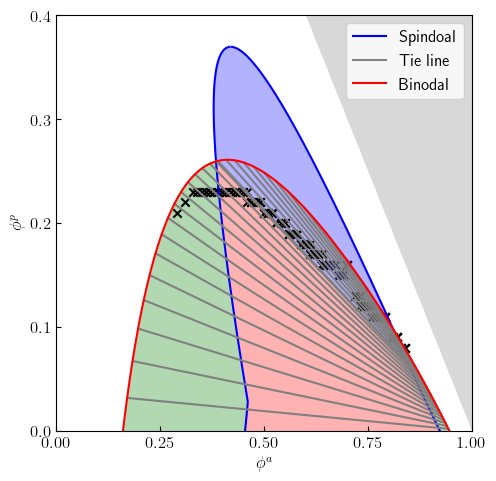

In [84]:
# plot_phase(fig, ax, v0, 12; Lxs = [])
display(fig)

In [87]:
# # start point 
# Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.45, 0.35, 7.5
# # sweep range
# ind_range = [(i,j) for j in [0], i in collect(0:-1:-40)]
# input_params = [(Lx, Nx, d2(ϕa + 0.01*i), d2(ϕp +0.01*j), v0) for (i,j) in ind_range]
# ϵ = 1e-4
# # load adjecnt then solve; stop if err/small 
# for input_param in input_params
#     output = load_adjacent_3(input_param...);
#     if output == "fail"
#         print("load_fail: $(input_param)")
#         break 
#     else
#         f,u,c = output;
#         Lx, Nx, ϕa, ϕp, v0 = input_param
#         f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
#         param, ps = get_outer_param_3(input_param...)
#         err, avmag, c = check_u_3(u,ps);
#         normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
#         if (normf < ϵ)|(err > ϵ)
#             print("end: $(input_param)")
#             break
#         end
#     end
# end

load_adjacent_3 (generic function with 1 method)

In [41]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
plot_phase(fig, ax, v0, 12; Lxs = [100])
# ϕa, ϕp = [ϕa, ϕp for (ϕa, ϕp) in zip(collect(0.3:0.02:0.75), collect(0.4:-0.01:1.5))  ]

PyObject <matplotlib.legend.Legend object at 0x7f80791cdfa0>

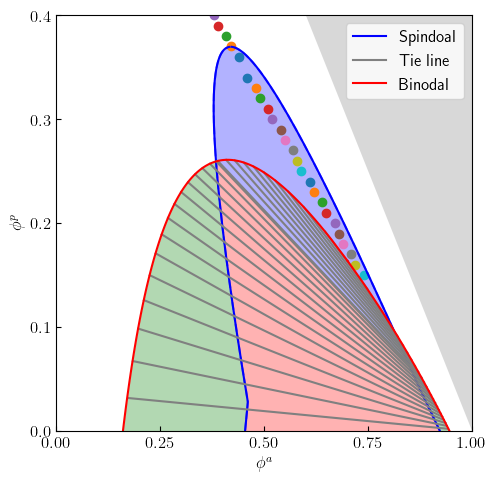

In [35]:
ϕa, ϕp = 0.45, 0.35
ind_range = [(i,i) for i in vcat(collect(1:10),collect(-1:-1:-20)) ]
input_params = [(Lx, Nx, d2(ϕa + (-0.36/25)*i), d2(ϕp +0.01*j), v0) for (i,j) in ind_range]
# [(d2(ϕa), d2(ϕp)) for (ϕa, ϕp) in zip(collect(0.38:(0.36/25):0.74), collect(0.4:-0.01:0.15)) ]
for input_param in input_params
    Lx, Nx, ϕa, ϕp, v0 = input_param
    ax.scatter(ϕa, ϕp)
end
display(fig)

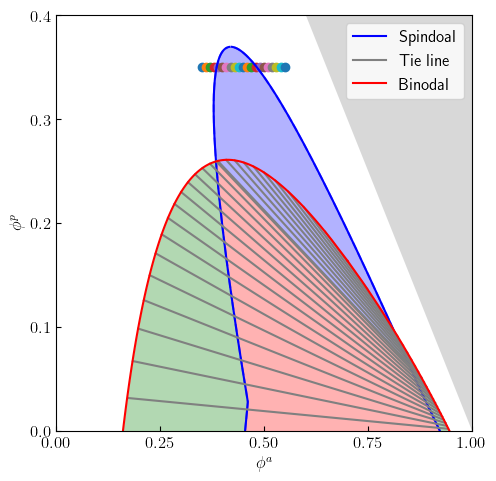

In [42]:
# start point
ind_range = [(i,j) for j in [0], i in collect(-10:1:10)]
ϕs = [ (d2(0.45 + 0.01*i), d2(0.35 +0.01*j)) for (i,j) in ind_range]
for (ϕa, ϕp) in ϕs
    ax.scatter(ϕa, ϕp)
end
display(fig)

In [164]:
# using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
ϕa, ϕp = 0.5, 0.32
ind_range = [(i,i) for i in collect(-1:-1:-20)]
input_params = [(Lx, Nx, d2(ϕa + (-0.36/25)*i), d2(ϕp +0.01*j), v0) for (i,j) in ind_range]
# input_params = anom_params
ϵ = 1e-4
# load adjecnt then solve; stop if err/small 
for input_param in input_params
    output = load_adjacent_3(input_param...);
    if output == "fail"
        print("load_fail: $(input_param)")
        break 
    else
        f,u,c = output;
        Lx, Nx, ϕa, ϕp, v0 = input_param
        f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
        param, ps = get_outer_param_3(input_param...)
        err, avmag, c = check_u_3(u,ps);
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        if (normf < ϵ)
            print("norm end: $(input_param)")
            break
        elseif (err > ϵ)
            print("err end: $(input_param)")
            break
        end
        ax.scatter(ϕa, ϕp)
    end
end
# plot_phase(fig, ax, v0, 12; Lxs = [])
# display(fig)

loaded: (100.0, 1024, 0.51, 0.31, 7.5)loaded: (100.0, 1024, 0.53, 0.31, 7.5)err end: (100.0, 1024, 0.53, 0.3, 7.5)

In [33]:
# Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.38, 1.24
# Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.56, 1.26
Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.56, 2.2
# Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.6, 2.2
# Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.7, 2.0
# Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.8, 1.8
# Lx,Nx,ϕa,ϕp,v0,ϕ,γ = 100.0, 1024, 0.3, 0.3, 7.5, 0.8, 2.2

using PyPlot, LaTeXStrings
# fig, ax = subplots(1,1,figsize=(5,5))
# ind_range = [(0,i) for i in collect(-1:-1:-26)]
# ind_range = [(0,i) for i in collect(1:1:80)]
ind_range = [(i,0) for i in collect(-1:-1:-20)]
input_params = [(Lx,Nx,ϕa,ϕp,v0, d2(ϕ+0.01*i),d2(γ+0.01*j) ) for (i,j) in ind_range]
ϵ = 1e-4
# load adjecnt then solve; stop if err/small 
for input_param in input_params
    output = load_adjacent_5(input_param...);
    if output == "fail"
        print("load_fail: $(input_param)")
        break 
    else
        f,u,c = output;
        Lx,Nx,ϕa,ϕp,v0,ϕ,γ = input_param
        
        f,u,c = solve_out_5(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
        ϕp = d2(sum(f)/Nx-sum(f[:,1:2])/Nx)
        ϕa = d2(sum(f[:,1:2])/Nx)

        param, ps = get_outer_param_5(Lx,Nx,ϕa,ϕp,v0,ϕ,γ)
        err, erri, avmag, cep = check_u_5(u,ps)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)

        if (normf < ϵ)
            print("norm end: $(input_param)")
            break
        elseif (err > ϵ)
            print("err end: $(input_param)")
            break
        end
        ax.scatter(ϕa, ϕp)
    end
end

no solution: output γ_maxno solution: output γ_maxloaded: (100.0, 1024, 0.32, 0.24, 7.5, 0.56, 2.2)

InterruptException: InterruptException:

In [22]:
get_BC(1.0,v0;initial_Δ = 1e-6, tol = 1e-8 )

(0.1610486593709347, 0.9463280883005671, 0.16104865937093468, 0.9463280883005671)

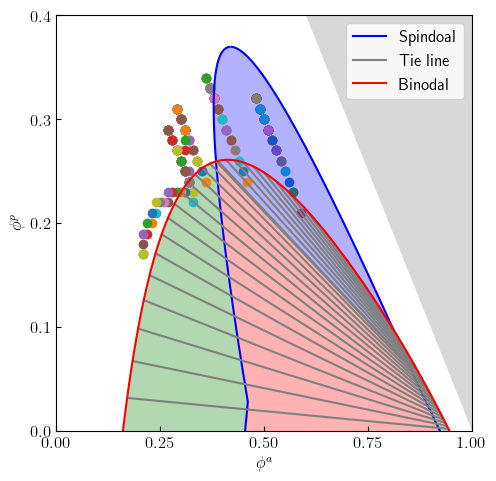

In [31]:
# plot_phase(fig, ax, v0, 12; Lxs = [])
display(fig)

In [161]:
anom_params[1]

(100.0, 1024, 0.5, 0.32, 7.5)

In [179]:
# output = load_adjacent_3(input_param...)
Lx, Nx, ϕa, ϕp, v0 = Lx, Nx, 0.56, 0.29, v0
f,u,c = load_out_3(Lx, Nx, ϕa, ϕp, v0)
normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
# load_adjacent_3(Lx, Nx, ϕa, ϕp, v0);

0.049940947459049104

In [181]:
input_param = anom_params[1]
Lx, Nx, ϕa, ϕp, v0 = Lx, Nx, 0.54, 0.29, v0
f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
param, ps = get_outer_param_3(Lx,Nx,ϕa,ϕp,v0)
normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
err, avmag, c = check_u_3(u,ps)
print(err," ",normf)

0.009689192924404677 0.05868512263437176

In [111]:
input_param = anom_params[1]
Lx, Nx, ϕa, ϕp, v0 = input_param
f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8, maxiters = 10)
param, ps = get_outer_param_3(input_param...)
normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
err, avmag, c = check_u_3(u,ps)
print(err," ",normf)

4.853450974451334e-12 6.682322443169926e-13

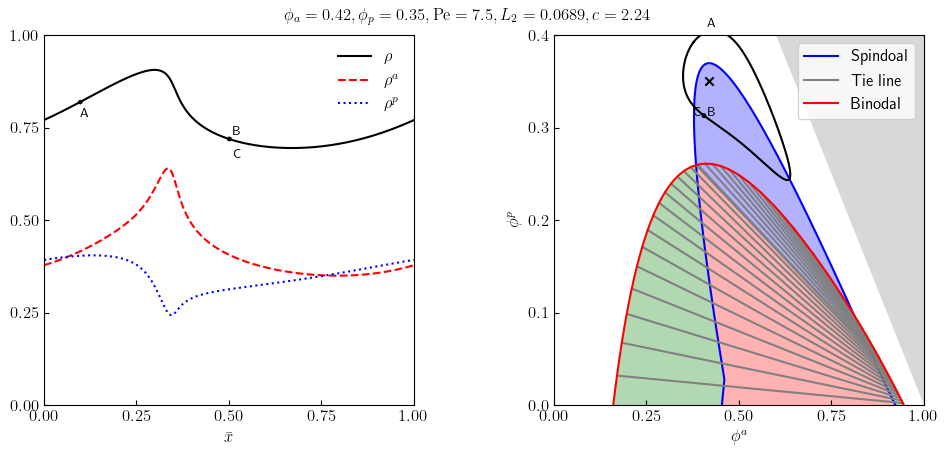

ϕa,ϕp=(0.42,0.35): c=2.239554496663273, avmag=1.8040624178810834e-6, err=2.327027459614328e-13

In [100]:
# Lx, Nx, ϕa, ϕp, v0 = 100.0, 1024, 0.42, 0.35, 7.5
# param, p2 = get_outer_param_3(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = load_out_3(Lx,Nx,ϕa,ϕp,v0)
# # f,u,c = solve_out_3(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
# err, avmag, c = check_u_3(u,p2);
# print("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")
# using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c, point = 100)